In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pylab import rcParams

%matplotlib inline

In [30]:
df = pd.read_csv('ADMISSIONS_DATA_TABLE.csv')
df.drop(df[df.ADMISSION_TYPE == 'NEWBORN'].index, inplace=True)

In [ ]:
df['ADMITTIME']=pd.to_datetime(df.ADMITTIME)
df['DISCHTIME']=pd.to_datetime(df.DISCHTIME)
df['DEATHTIME']=pd.to_datetime(df.DEATHTIME)
df['EDREGTIME']=pd.to_datetime(df.EDREGTIME)
df['EDOUTTIME']=pd.to_datetime(df.EDOUTTIME)

In [111]:
df.columns

Index([u'ROW_ID', u'SUBJECT_ID', u'HADM_ID', u'ADMITTIME', u'DISCHTIME',
       u'DEATHTIME', u'ADMISSION_TYPE', u'ADMISSION_LOCATION',
       u'DISCHARGE_LOCATION', u'INSURANCE', u'LANGUAGE', u'RELIGION',
       u'MARITAL_STATUS', u'ETHNICITY', u'EDREGTIME', u'EDOUTTIME',
       u'DIAGNOSIS', u'HOSPITAL_EXPIRE_FLAG', u'HAS_IOEVENTS_DATA',
       u'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [169]:
df['stay_length'] = df.DISCHTIME - df.ADMITTIME
a=df['stay_length'].astype('timedelta64[h]')

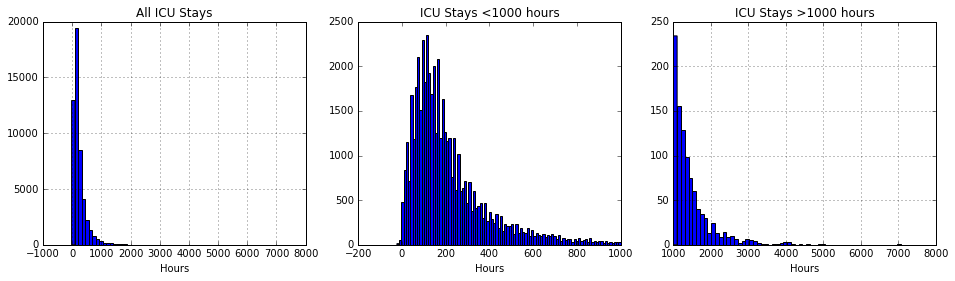

In [200]:
### looking at icu stay lengths
a=df['stay_length'].astype('timedelta64[h]')
rcParams['figure.figsize'] = 16, 4
b=a[a<1000]
c=a[a>1000]
plt.subplot(131)
a.hist(bins=60)
plt.title('All ICU Stays')
plt.xlabel('Hours')
plt.subplot(132)
hist0=plt.hist(b,bins=100)
plt.title('ICU Stays <1000 hours')
plt.xlabel('Hours')
plt.subplot(133)
c.hist(bins=60)
plt.title('ICU Stays >1000 hours')
plt.xlabel('Hours')

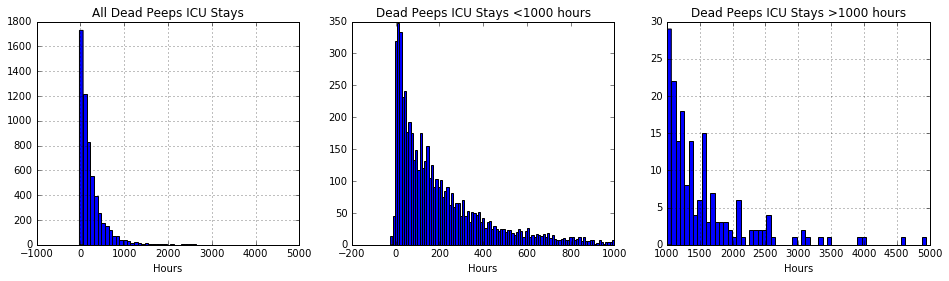

In [201]:
dead = df[pd.notnull(df.DEATHTIME)]
dead_stay_length = dead['stay_length'].astype('timedelta64[h]')
short_dead_stays = dead_stay_length[dead_stay_length<1000]
long_dead_stays = dead_stay_length[dead_stay_length>1000]
rcParams['figure.figsize'] = 16, 4

plt.subplot(131)
dead_stay_length.hist(bins=60)
plt.title('All Dead Peeps ICU Stays')
plt.xlabel('Hours')
plt.subplot(132)
hist1=plt.hist(short_dead_stays, bins=100)
plt.title('Dead Peeps ICU Stays <1000 hours')
plt.xlabel('Hours')
plt.subplot(133)
long_dead_stays.hist(bins=60)
plt.title('Dead Peeps ICU Stays >1000 hours')
plt.xlabel('Hours')

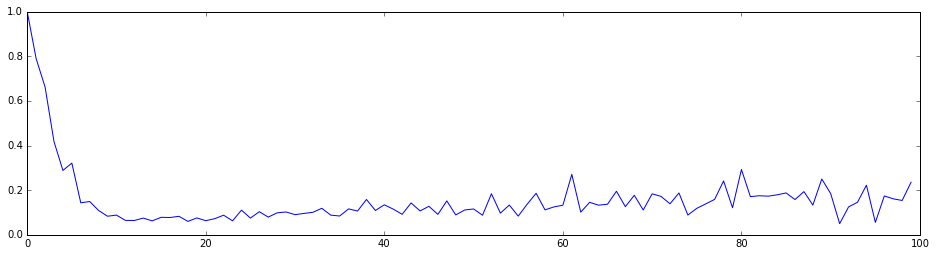

In [203]:
countvec0 = hist0[0]
countvec1 = hist1[0]
probvec = countvec1/countvec0
plt.plot(probvec)

In [116]:
train = pd.get_dummies(df[['INSURANCE', 'RELIGION',
                           'ADMISSION_TYPE', 'ADMISSION_LOCATION',
                           'LANGUAGE', 'MARITAL_STATUS', 'ETHNICITY']])

In [113]:
y=pd.notnull(df.DEATHTIME ).astype(int)

In [114]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3,
                                                    random_state=42)

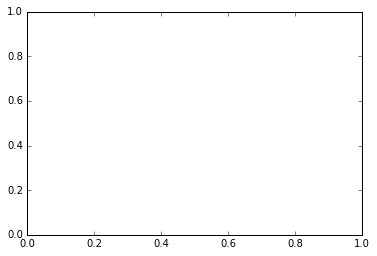

In [115]:
#'INSURANCE', 'RELIGION','ADMISSION_TYPE', 'ADMISSION_LOCATION','LANGUAGE', 'MARITAL_STATUS', 'ETHNICITY'
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
pred_vals_lr = model_lr.predict_proba(X_test)
pr_curve(y_test,pred_vals_lr[:,1]);

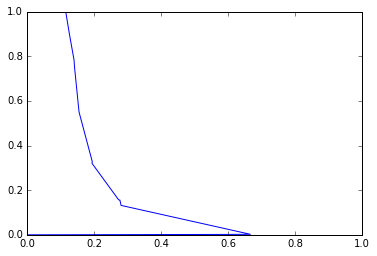

In [105]:
#relgiion and insurance only
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
pred_vals_lr = model_lr.predict_proba(X_test)
pr_curve(y_test,pred_vals_lr[:,1]);

In [87]:
import numpy as np
import matplotlib.pyplot as plt


def pr_curve(truthvec, scorevec, digit_prec=2):
    threshvec = np.unique(np.round(scorevec,digit_prec))
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)

    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
    plt.plot(precisionvec,recallvec)
    plt.axis([0, 1, 0, 1])
    return (recallvec, precisionvec, threshvec)

